In [15]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

In [16]:
import networkx as nx
import random

def generate_clustered_graph(N=300, p_ws=0.02, extra_links=3, num_subgroups=15):
    G = nx.Graph()

    for _ in range(num_subgroups):
        subgroup_size = random.randint(5, 10)
        subgraph = nx.watts_strogatz_graph(subgroup_size, max(2, subgroup_size // 4), p_ws)
        mapping = {i: random.randint(0, N - 1) for i in range(subgroup_size)}
        H = nx.relabel_nodes(subgraph, mapping)
        G = nx.compose(G, H)

    for _ in range(extra_links):
        a, b = random.sample(range(N), 2)
        G.add_edge(a, b)

    return G

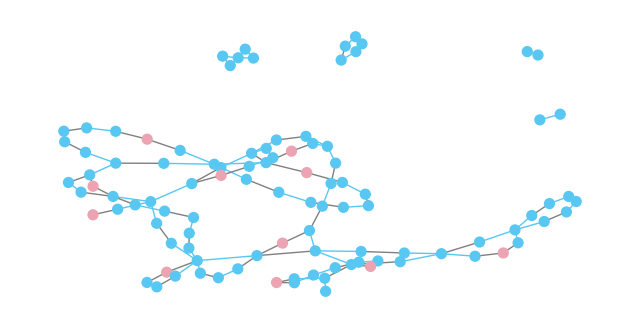

In [29]:
from src.solvers.greedy import GreedySolver
import matplotlib.pyplot as plt

random.seed(42)

graph = generate_clustered_graph(N=300, p_ws=0.02, extra_links=3, num_subgroups=15)

individual_cost = 1.0
group_cost = 1.2
group_size = 6

coverage = GreedySolver(graph, individual_cost, group_cost, group_size)

node_colors = []
edge_colors = []

for node in graph.nodes():
    if node in coverage["individual"]:
        node_colors.append("#eda4b2")
    else:
        node_colors.append("#58c8f2")

for u, v in graph.edges():
    in_same_group = any(u in members and v in members for members in coverage["group"].values())
    if in_same_group:
        edge_colors.append("#58c8f2")
    else:
        edge_colors.append("gray")

plt.figure(figsize=(8, 4))
pos = nx.spring_layout(graph, seed=42)
plt.gca()
nx.draw(graph, pos, node_color=node_colors, edge_color=edge_colors, with_labels=False, node_size=50)
plt.show()
